In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.load_data import load_all_data
from src.clean_data import clean_contacts, clean_users, clean_listings
from src.metrics import (
    booking_rate, response_rate, acceptance_rate,
    avg_response_time, avg_accept_time,
    conversion_by_contact_channel, conversion_by_user_stage
)
from src.funnel_analysis import (
    get_funnel_stage_distribution, funnel_by_contact_channel,
    funnel_by_guest_user_stage, funnel_by_room_type, funnel_by_neighborhood
)
from src.recommendations import generate_recommendations



In [67]:
# Load raw data
contacts_df, listings_df, users_df = load_all_data()

# Clean
contacts_df = clean_contacts(contacts_df)
listings_df = clean_listings(listings_df)
users_df = clean_users(users_df)


c:\Users\vaish\OneDrive\Desktop\Semester4\DataProjects\airbnb-rio-booking-analysis-\src\clean_data.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_reviews'] = df['total_reviews'].fillna(0).astype(int)


In [68]:
print("Booking Rate:", booking_rate(contacts_df))
print("Response Rate:", response_rate(contacts_df))
print("Acceptance Rate:", acceptance_rate(contacts_df))
print("Avg Response Time (hrs):", avg_response_time(contacts_df))
print("Avg Acceptance Time (hrs):", avg_accept_time(contacts_df))

conversion_channel = conversion_by_contact_channel(contacts_df)
print(conversion_channel)

conversion_user_type = conversion_by_user_stage(contacts_df)
print(conversion_user_type)


Booking Rate: 0.4154982608383835
Response Rate: 0.9271345071180119
Acceptance Rate: 0.5886255244379102
Avg Response Time (hrs): 19.436510889607842
Avg Acceptance Time (hrs): 20.832697804521164
contact_channel_first
instant_book    1.000000
book_it         0.476094
contact_me      0.071017
Name: booking_happened, dtype: float64
guest_user_stage_first
past_booker    0.526325
-unknown-      0.400000
new            0.332285
Name: booking_happened, dtype: float64


In [69]:
# Funnel stages
funnel_dist = get_funnel_stage_distribution(contacts_df)
print(funnel_dist)

# By channel
print(funnel_by_contact_channel(contacts_df))

# By user type
print(funnel_by_guest_user_stage(contacts_df))

# By room type
room_type_conv = funnel_by_room_type(contacts_df, listings_df)
print(room_type_conv)

# By neighborhood
neighborhood_perf = funnel_by_neighborhood(contacts_df, listings_df)
neighborhood_perf.head()


funnel_stage
booked      0.415498
replied     0.338509
accepted    0.173127
no_reply    0.072865
Name: proportion, dtype: float64
funnel_stage           accepted    booked  no_reply   replied
contact_channel_first                                        
book_it                 0.03072  0.476094  0.103156  0.390031
contact_me              0.35633  0.071017  0.091129  0.481525
instant_book            0.00000  1.000000  0.000000  0.000000
guest_user_stage_first
past_booker    0.526325
-unknown-      0.400000
new            0.332285
Name: booking_happened, dtype: float64
room_type
private room    0.471175
shared room     0.326014
Name: booking_happened, dtype: float64


,mean,count
listing_neighborhood,,
Lagoa,0.727273,55
Santa Teresa,0.640777,309
Leme,0.619469,113
Centro,0.573770,61
Ipanema,0.572482,407


In [70]:
metrics_summary = {
    "booking_rate": booking_rate(contacts_df),
    "avg_response_time": avg_response_time(contacts_df),
}

recommendations = generate_recommendations(
    metrics=metrics_summary,
    funnel_by_channel=conversion_channel,
    room_type_conversion=room_type_conv,
    user_stage_conversion=conversion_user_type
)

for rec in recommendations:
    print("Insight:", rec['insight'])
    print("Recommendation:", rec['recommendation'])
    print("---")


Insight: Instant Book has a conversion rate of 100.00%, significantly higher than the average 41.55%.
Recommendation: Encourage more hosts to opt in to Instant Book. Consider incentives or feature promotions.
---
Insight: Private Rooms have the highest booking rate at 47.12%. Shared Rooms convert at only 32.60%.
Recommendation: Surface more private rooms in search results, or improve the visibility of better-converting room types.
---
Insight: Average host response time is 19.4 hours, which may be too slow for real-time booking expectations.
Recommendation: Improve host responsiveness — consider SMS nudges, response SLAs, or reward fast responders.
---


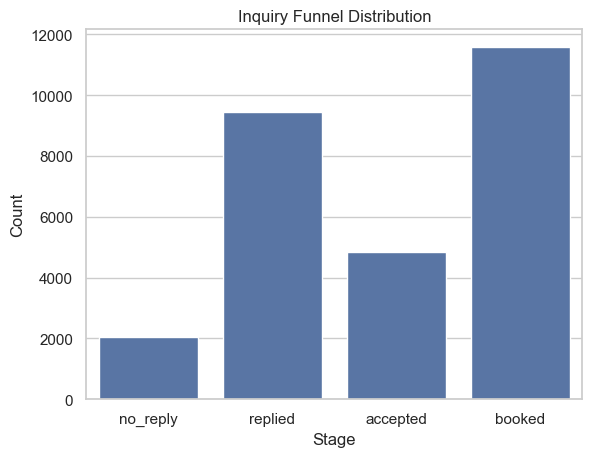

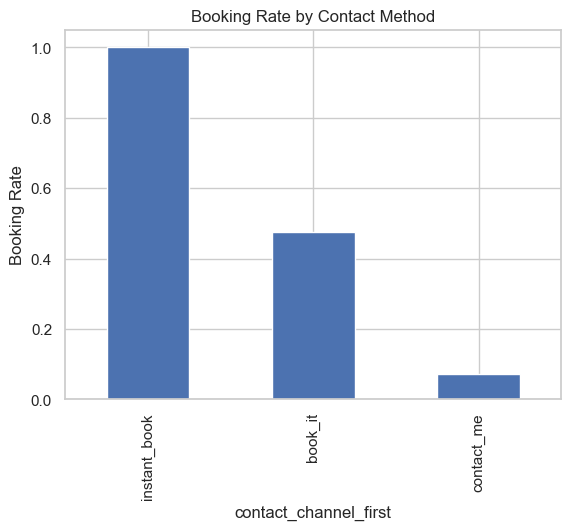

In [71]:
# Funnel stage distribution bar chart
sns.countplot(data=contacts_df, x='funnel_stage', order=['no_reply', 'replied', 'accepted', 'booked'])
plt.title('Inquiry Funnel Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

# Booking rate by contact method
conversion_channel.plot(kind='bar', title='Booking Rate by Contact Method', ylabel='Booking Rate')
plt.show()


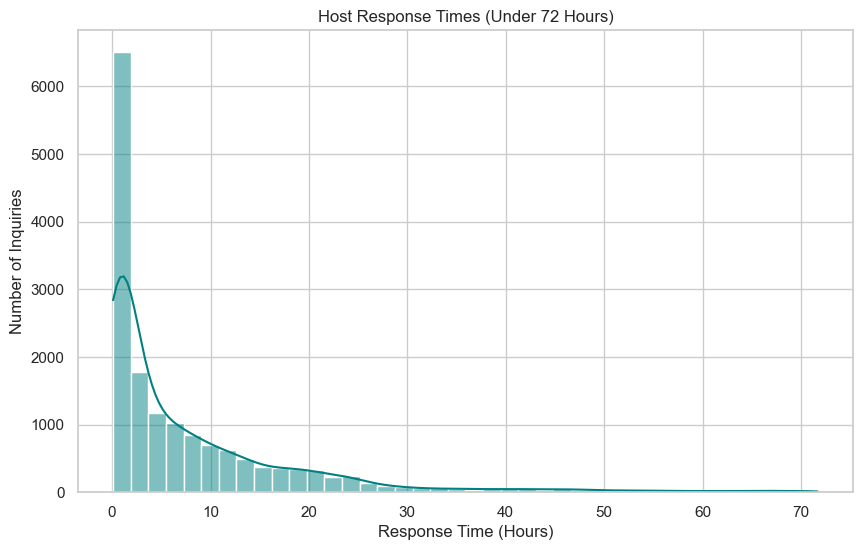

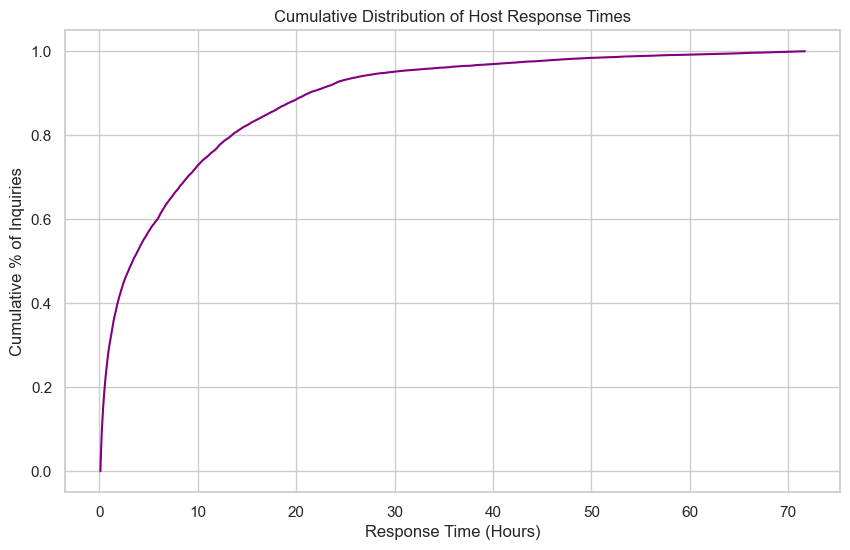

In [72]:
from src.plots import (
    plot_trimmed_response_time_distribution,
    plot_response_time_cdf
)

plot_trimmed_response_time_distribution(contacts_df, max_hours=72)
plot_response_time_cdf(contacts_df, max_hours=72)


c:\Users\vaish\OneDrive\Desktop\Semester4\DataProjects\airbnb-rio-booking-analysis-\src\plots.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='funnel_stage', order=order, palette="Blues_d")


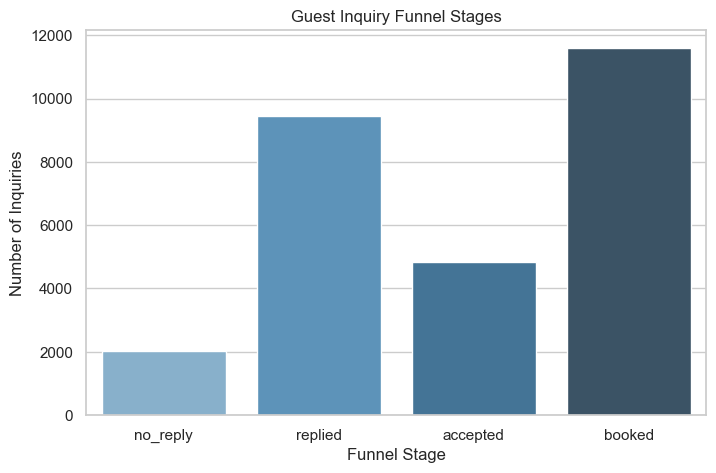

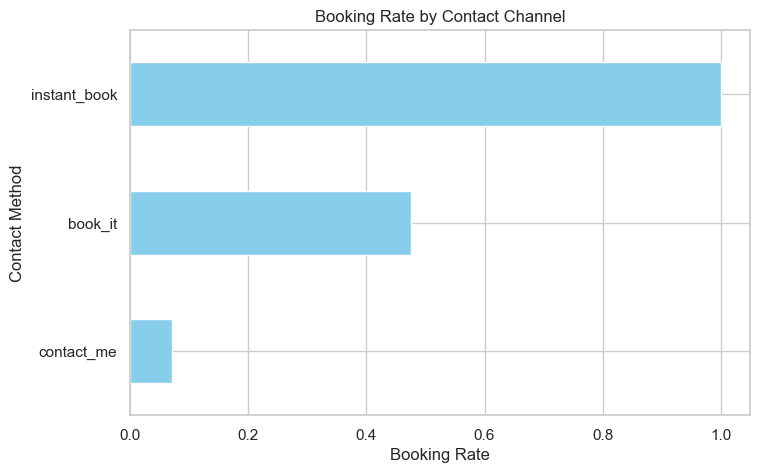

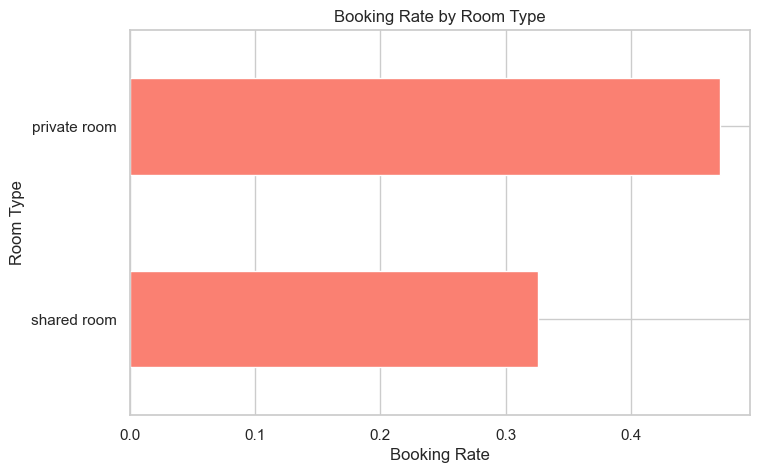

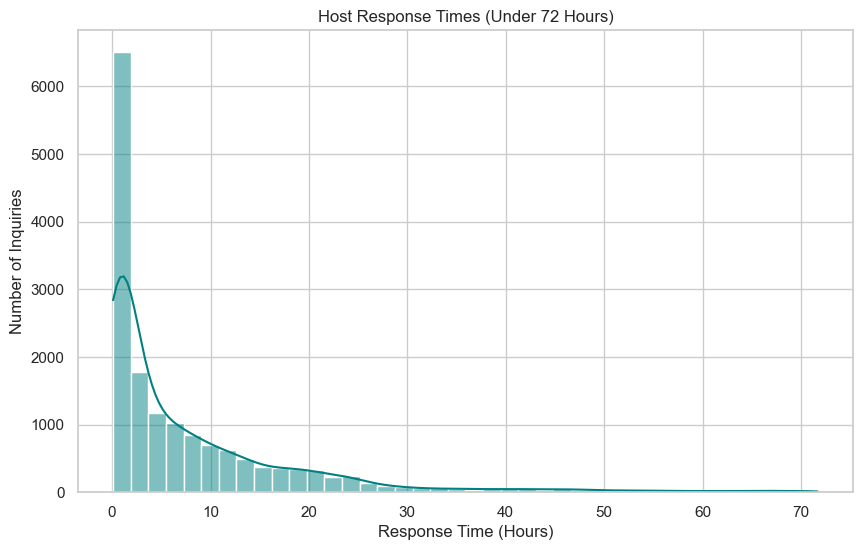

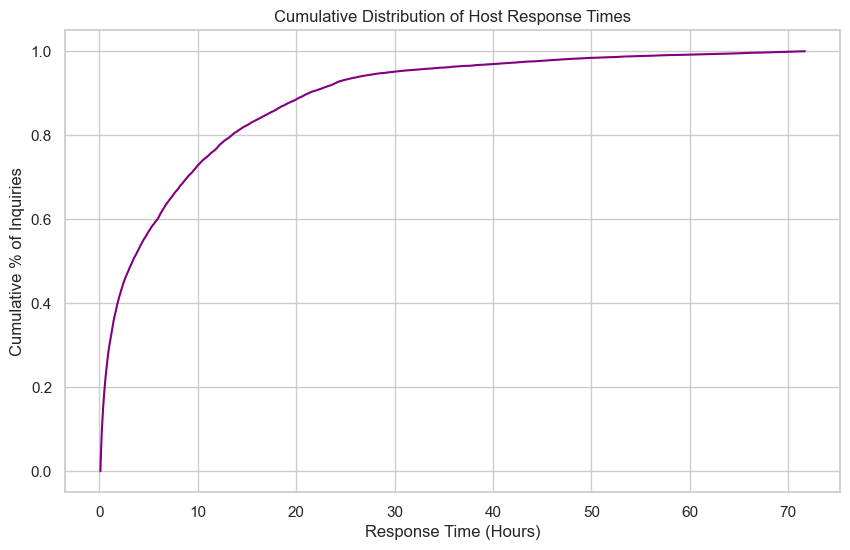

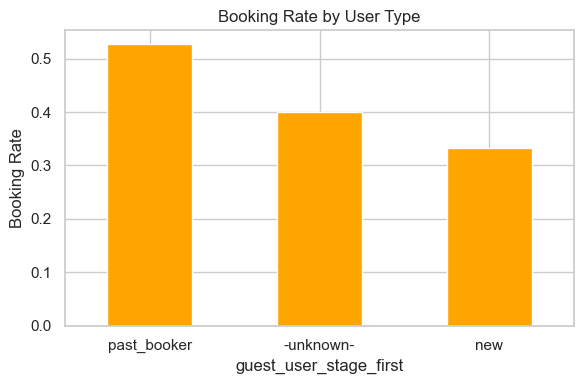

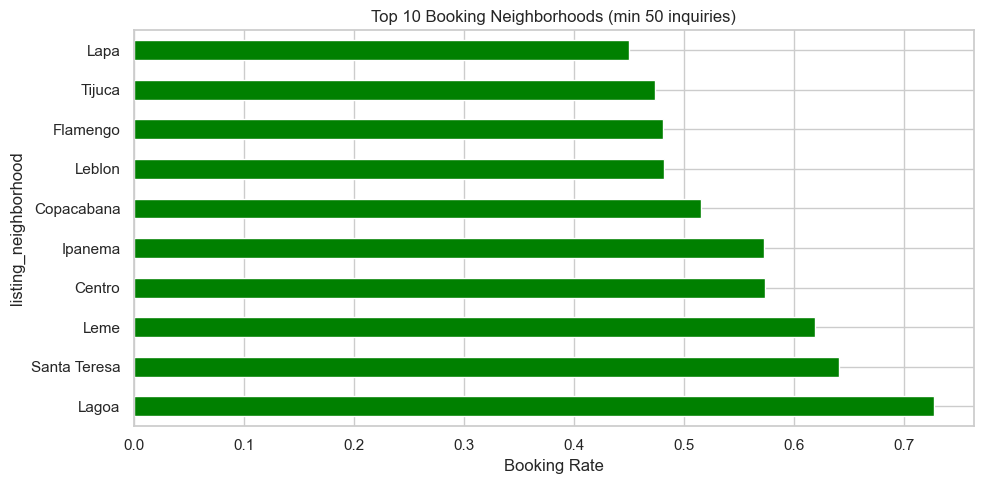

In [73]:
import os
from src.plots import (
    plot_funnel_stage_distribution,
    plot_booking_rate_by_contact_channel,
    plot_booking_rate_by_room_type,
    plot_trimmed_response_time_distribution,
    plot_response_time_cdf
)
from src.funnel_analysis import funnel_by_guest_user_stage, funnel_by_neighborhood
from src.metrics import conversion_by_user_stage
import matplotlib.pyplot as plt

# Create output folder if it doesn't exist
os.makedirs("outputs/plots", exist_ok=True)

# === 1. Funnel Stage Distribution ===
plot_funnel_stage_distribution(contacts_df, save_path="outputs/plots/funnel_stage.png")

# === 2. Booking Rate by Contact Channel ===
plot_booking_rate_by_contact_channel(contacts_df, save_path="outputs/plots/booking_by_contact_method.png")

# === 3. Booking Rate by Room Type ===
plot_booking_rate_by_room_type(contacts_df, listings_df, save_path="outputs/plots/booking_by_room_type.png")

# === 4. Host Response Time (Trimmed) ===
plot_trimmed_response_time_distribution(contacts_df, max_hours=72, save_path="outputs/plots/response_time_trimmed.png")

# === 5. Host Response Time (CDF) ===
plot_response_time_cdf(contacts_df, max_hours=72, save_path="outputs/plots/response_time_cdf.png")

# === 6. Booking Rate by User Stage (manual plot) ===
user_stage_conv = conversion_by_user_stage(contacts_df)
plt.figure(figsize=(6, 4))
user_stage_conv.plot(kind='bar', color='orange')
plt.title("Booking Rate by User Type")
plt.ylabel("Booking Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/plots/booking_by_user_stage.png")
plt.show()

# === 7. (Optional) Booking Rate by Neighborhood (Top 10) ===
neighborhood_df = funnel_by_neighborhood(contacts_df, listings_df, min_inquiries=50)
top10 = neighborhood_df.head(10)

plt.figure(figsize=(10, 5))
top10['mean'].plot(kind='barh', color='green')
plt.xlabel("Booking Rate")
plt.title("Top 10 Booking Neighborhoods (min 50 inquiries)")
plt.tight_layout()
plt.savefig("outputs/plots/booking_by_neighborhood.png")
plt.show()
